# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Massa van de maatbeker: 0.8208 kg
Massa van de maatbeker + water aan het begin: 1.2929 kg
Massa van de maatbeker + water aan het eind: 1.2749 kg
Massa van het water aan het begin: 0.47209999999999996 kg
Geschat vermogen: 44.57 W ± 0.36 W


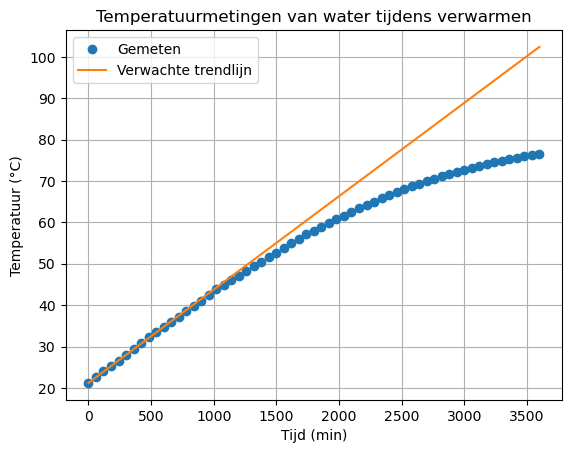

Totaal toegevoegde energie: 160468.30 J
Totaal gebruikte energie voor verdamping: 45028.80 J
Rendement van het verwarmingsproces: 71.94 %
Mogelijke verbeteringen aan het experiment kunnen zijn:
- Gebruik een beter geïsoleerde maatbeker om warmteverlies te verminderen.
- Meet de omgevingstemperatuur en corrigeer voor warmteverlies aan de omgeving.
- Gebruik een nauwkeurigere thermometer voor betere temperatuurmetingen.
- Herhaal het experiment meerdere keren om gemiddelde waarden te verkrijgen en de precisie te verbeteren.
- De druk constant houden zodat er geen fouten worden gemaakt door veranderende druk in de berekening van het vermogen. Het kookpunt verschilt namelijk erg als de druk varieert gedurende de tijd.


In [1]:
# plot temperature measurements
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#1 Temperature measurements and power estimation 

tempmetingen = np.loadtxt('tempmetingen.csv', delimiter=';', skiprows=1)
t = tempmetingen[:,0]  # tijd in minuten
t_sec = t * 60  # tijd in seconden
T = tempmetingen[:,1]  # temperatuur in graden Celsius


m_maatbeker = 0.8208  # massa van de maatbeker in kg
print(f'Massa van de maatbeker: {m_maatbeker} kg')
m_maatbeker_en_water_start = 1.2929 # massa van de maatbeker + water aan het begin in kg
print(f'Massa van de maatbeker + water aan het begin: {m_maatbeker_en_water_start} kg')
m_maatbeker_en_water_eind = 1.2749 # massa van de maatbeker + water aan het eind in kg
print(f'Massa van de maatbeker + water aan het eind: {m_maatbeker_en_water_eind} kg')
c_water = 4186 # soortelijke warmte van water in J/(kg·K)
m_water_start = m_maatbeker_en_water_start - m_maatbeker  # massa van het water aan het begin in kg
print(f'Massa van het water aan het begin: {m_water_start} kg')
m_water_eind = m_maatbeker_en_water_eind - m_maatbeker  # massa van het water aan het eind in kg
m_water_verloren = m_water_start - m_water_eind  # massa van het water dat is verdampt in kg

def bereken_vermogen(t, P):
    return 21.2 + (P * t) / (m_water_start * c_water)
    
# Bereken het vermogen
popt, pcov = curve_fit(bereken_vermogen, t_sec[:5], T[:5]) 
P_fit = popt[0]
u_P_fit = np.sqrt(np.diag(pcov))[0]
print(f'Geschat vermogen: {P_fit:.2f} W ± {u_P_fit:.2f} W')  # vermogen in Watt (aan te passen)

T_theorie = bereken_vermogen(P_fit, t_sec)

# Plotten
plt.plot(t_sec, T, 'o', label='Gemeten')
plt.plot(t_sec, T_theorie, '-', label='Verwachte trendlijn')
plt.xlabel('Tijd (min)')
plt.ylabel('Temperatuur (°C)')
plt.title('Temperatuurmetingen van water tijdens verwarmen')
plt.grid(True)
plt.legend()
plt.show()

#2 Energie en rendement

# Bereken de hoeveelheid energie die is toegevoegd
E_toegevoegd = P_fit * t_sec[-1]  # in Joules
print(f'Totaal toegevoegde energie: {E_toegevoegd:.2f} J')

# Bereken de hoeveelheid energie die is gebruikt voor verdamping
L_vaporisatie = 2501600  # Latente warmte van verdamping voor water in J/kg gevonden in tabel A2
E_verdampt = m_water_verloren * L_vaporisatie  # in Joules
print(f'Totaal gebruikte energie voor verdamping: {E_verdampt:.2f} J')

# Bereken het rendement
rendement = ((E_toegevoegd - E_verdampt) / E_toegevoegd) * 100  # in procenten
print(f'Rendement van het verwarmingsproces: {rendement:.2f} %')

# 3 Verbeteringen en reflectie

print("Mogelijke verbeteringen aan het experiment kunnen zijn:")
print("- Gebruik een beter geïsoleerde maatbeker om warmteverlies te verminderen.")
print("- Meet de omgevingstemperatuur en corrigeer voor warmteverlies aan de omgeving.")
print("- Gebruik een nauwkeurigere thermometer voor betere temperatuurmetingen.")
print("- Herhaal het experiment meerdere keren om gemiddelde waarden te verkrijgen en de precisie te verbeteren.")
print("- De druk constant houden zodat er geen fouten worden gemaakt door veranderende druk in de berekening van het vermogen. Het kookpunt verschilt namelijk erg als de druk varieert gedurende de tijd.")
